In [2]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "PastHires.csv" # dados de contratações passadas
df = pd.read_csv(input_file, header = 0)

In [3]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [4]:
# mapeia valores categóricos de sim (Y) e não (N) para 1 e 0
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

# mapeia os níveis de educação de 0 (BS), 1 (MS) e 2 (PhD)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [5]:
#atributos usados para treinar o modelo
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [6]:
y = df["Hired"]# separa a coluna alvo 'Hired' como o conjunto de labels y

X = df[features] # separa as features selecionadas como o conjunto de dados X

clf = tree.DecisionTreeClassifier()# inicializa o classificador de árvore de decisão

# treina o modelo 
clf = clf.fit(X, y)

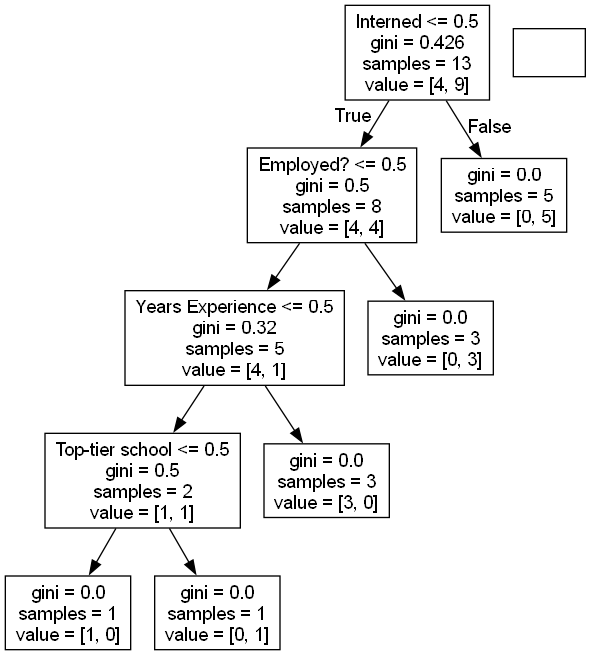

In [7]:
from IPython.display import Image  
from io import StringIO  
import pydotplus

# gera um gráfico da árvore de decisão
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=features) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [8]:
# usando random forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[1]


c:\Users\thass\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\thass\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
